# Ottimizzazione del portafoglio

Partiamo dalle basi di quello che sembra una magia, supponiamo di avere due assett **A** e **B** con i seguenti rendimenti e varianza:

| Assett | Rendimento    | Rischio/Dev Standard  |
|-------| ------------- | ------------- |
|A | 4             | 10            |
|B | 6             | 14            |


La domanda che mi pongo ora è la seguente, quale sarà il rendimento / rischio di un portafoglio che è la combinazione dei due assett ?

Partiamo dalle cose semplici quale sarà il rendimento e il rischio di un portafoglio composto al 100% da A? (Ovvio sarà i valore della riga A)


Ora complichiamo un pochino le cose quale sarà il rischio e il rendimento di un portafoglio al 50% composto da A e al 50% composto da B? 

Portemmo dare una risposta ragionevole dicendo che il rendimento sarà la media ponderata dei di rendimenti il 5% e stessa cosa il rischio pari ad un 12%. 
La cosa non è propriamente corretta,per il rendimento possiamo usare la media ma per la parte del rischio non possiamo!

Con le informazioni in nostro possesso non possiamo rispondere correttamente ci manca un dato fondamentale, non sappiamo quanto A e B sono correlati tra loro. 

Se i due assett sono perfettamente correlati si comporterebbero come una cosa sola e sarebbe perfetto calcolare la media dei due, ma se questi due non lo sono potremmo vedere un Assett scendere e l'altro salire dunque la combinazione dei due potrebbe essere minore di quel che si pensa. Questa è la magia della costruzione del portafoglio.

Supponiamo che la correlazione tra i due assett sia pari a $\rho_{(a,b)} = 0.4$.

Supponiamo anche di impostare i pesi dei due assett come $w_A$ e $w_B$ il peso $w$ è un numero comporeso tra 0 e 1 allora il rendimento del nostro portafoglio sarà:


$$
R_{(w_a,w_b)} = w_a \times R_a + w_b \times R_b
$$


Il rischio invece è dato dalla formula 

$$
\sigma^2_{(w_a,w_b)} = \sigma^2_{a}w^2{a} + \sigma^2_{b}w^2{b} + 2w_aw_b\sigma_a\sigma_b\rho_{ab}
$$


Prendiamo una lista di pesi e calcoliamo rendimento totale e rischio

In [2]:
import numpy as np
import pandas as pd

wa = np.linspace(0,1,100)
wb = 1 - wa
data = np.column_stack((wa, wb))

In [3]:
df = pd.DataFrame(data=data,columns=['wa','wb'])
df

,wa,wb
0,0.000000,1.000000
1,0.010101,0.989899
2,0.020202,0.979798
3,0.030303,0.969697
4,0.040404,0.959596
...,...,...
95,0.959596,0.040404
96,0.969697,0.030303
97,0.979798,0.020202
98,0.989899,0.010101


Calcoliamo il rendimento

In [4]:
reta = 0.04
retb = 0.06

df['ret'] = df.wa * reta + df.wb * retb

Calcoliamo il rischio

In [5]:
corr = 0.4
sigmaa = 0.1
sigmab = 0.14

df['risk'] = sigmaa * df.wa ** 2 + sigmab * df.wb ** 2 + 2 * df.wa * df.wb * sigmaa * sigmab * corr
df

,wa,wb,ret,risk
0,0.000000,1.000000,0.060000,0.140000
1,0.010101,0.989899,0.059798,0.137308
2,0.020202,0.979798,0.059596,0.134663
3,0.030303,0.969697,0.059394,0.132065
4,0.040404,0.959596,0.059192,0.129513
...,...,...,...,...
95,0.959596,0.040404,0.040808,0.092745
96,0.969697,0.030303,0.040606,0.094489
97,0.979798,0.020202,0.040404,0.096279
98,0.989899,0.010101,0.040202,0.098116


In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

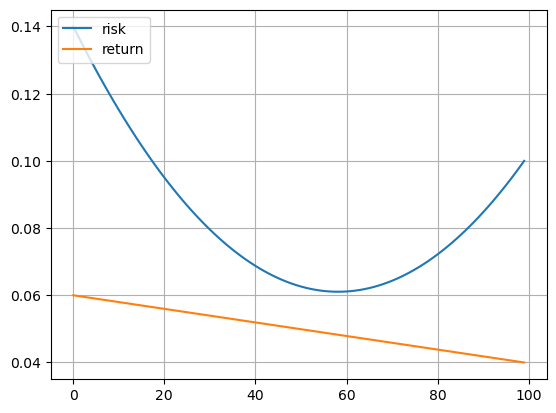

In [7]:
plt.plot(df.index,df['risk'],label='risk')
plt.plot(df.index,df['ret'],label='return')
plt.grid()
plt.legend(loc="upper left")

Vediamo subito che il rischio ha un grafico a forma di curva e addirittura la combinazione dei due Assett ha un rischio minore dei singoli.

Creiamo ora un grafico e mettiamo in correlazione rischio e rendimento

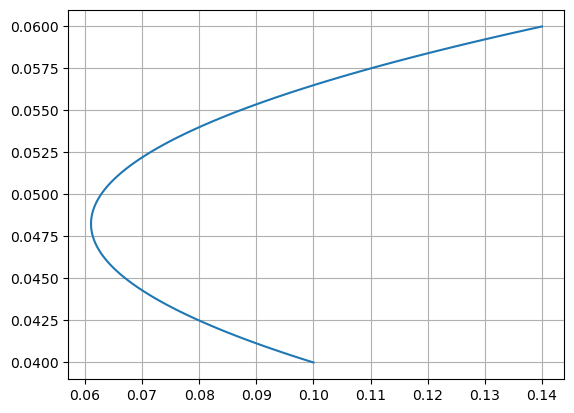

In [8]:
plt.plot(df['risk'],df['ret'])
plt.grid()

Vediamo che esite un punto in cui la volatilità è minima e il rendimento è un valore compreso tra i due, potremmo partire da una delle due estremità e arrivare al punto minimo in quanto se notiamo bene la forma è convessa.
Più i due investimenti sono decorrelati più la curva verrà pronunciata "provate per curiosità a cambiare il valore di corr".

# Frontiera efficiente

Cominciamo a cercare di creare i nostri primi portafogli, andiamo a comprendere il concetto di frontiera efficiente carichiamo un nuovo dataset sempre ottenuto dal sito di Ken French questo dataset contiene 30 portafogli industriali (ponderati in base al valore) con i rendimenti mensili

In [9]:
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip()

In [10]:
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
import risk as rk

In [13]:
rk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.064036
Beer     0.038017
Smoke    0.083784
dtype: float64

<Axes: >

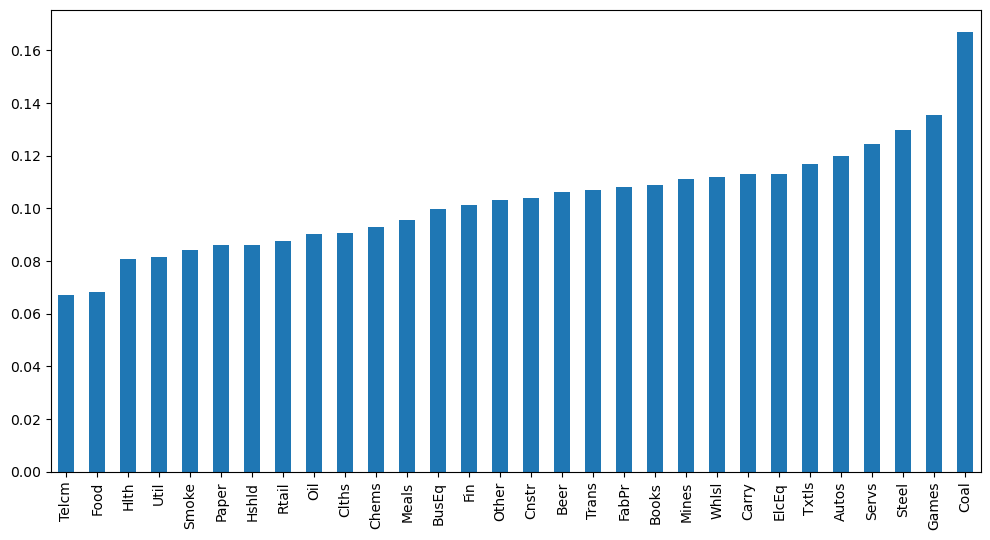

In [15]:
rk.var_gaussian(ind).sort_values().plot.bar(figsize=(12,6))

Creaiamoci delle funzioni di utilità al fine di calcolare:
* Il rendimento annualizzato
* La volatilità annualizzata
* lo Sharpe ratio

In [16]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [17]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [18]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

<Axes: title={'center': 'Industry Sharpe Ratio from 1926 to 2018'}>

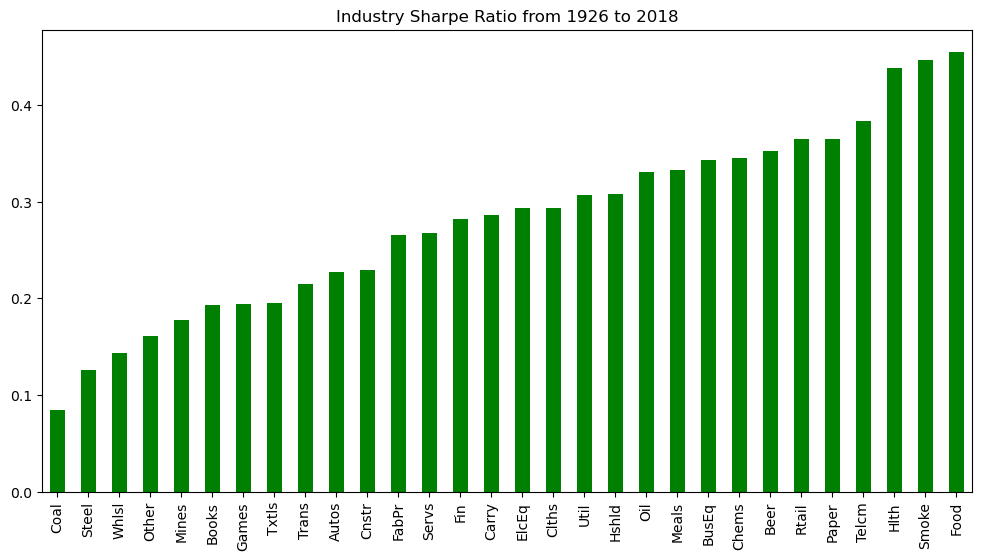

In [24]:
sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratio from 1926 to 2018",color='Green',figsize=(12,6))

Dal grafico vediamo che il settore carbonifero ha in indice di sharpe mediocre mentre il settore Food, Smoke e Healtcare hanno rapporti rischio rendimento interessanti.

Analizziamo i dati su un periodo più ristretto ad esempio dal 2000 in poi

<Axes: title={'center': 'Industry Sharpe Ratio from 2000 to 2018'}>

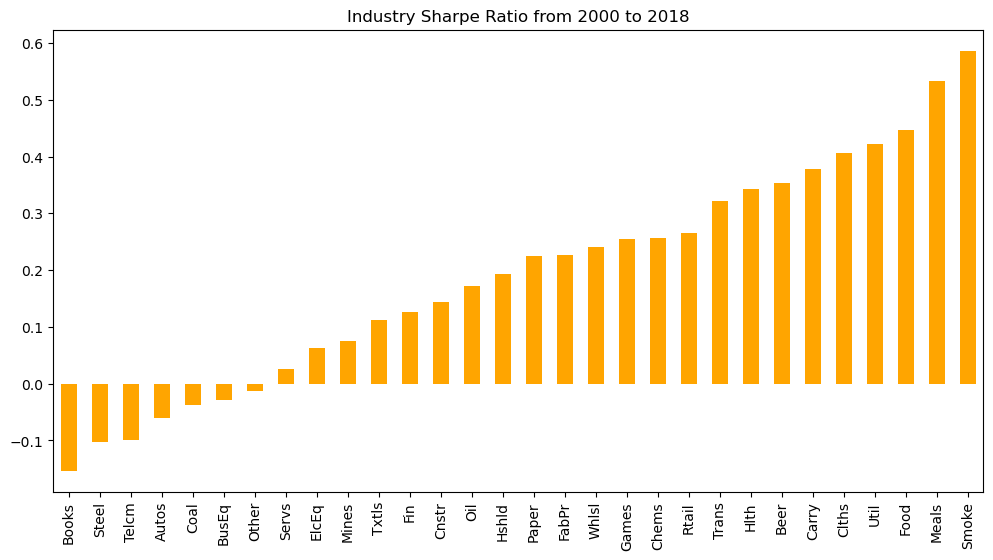

In [26]:
sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratio from 2000 to 2018",color='Orange',figsize=(12,6))

Qui addirittura otteniamo valoti sharp ratio negativo, non buono in quanto significa che il rendimento è minore del risk free